In [21]:
# Initial imports
import requests
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
 

In [2]:
Crypto_Data = pd.read_csv("crypto_data.csv")

In [3]:
# Keep only necessary columns:
# 'CoinName','Algorithm','IsTrading','ProofType','TotalCoinsMined','TotalCoinSupply'

Crypto_Data.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [4]:
Crypto_df = Crypto_Data.drop(columns=["Unnamed: 0"])

In [5]:
Crypto_df.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [7]:
# Keep only cryptocurrencies that are trading
Crypto_Trading = Crypto_df.loc[Crypto_df["IsTrading"]==True]
Crypto_Trading.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [8]:
# Keep only cryptocurrencies with a working algorithm
Crypto_Trading = Crypto_Trading.loc[Crypto_Trading["Algorithm"] != "N/A"]
Crypto_Trading.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [9]:
# Remove the 'IsTrading' column
Crypto_Trading = Crypto_Trading.drop(columns = ["IsTrading"])
Crypto_Trading.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365Coin,X11,PoW/PoS,NaN,2300000000
2,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,SixEleven,SHA-256,PoW,NaN,611000
4,808,SHA-256,PoW/PoS,0.000000e+00,0


In [11]:
# Remove rows with at least 1 null value
Crypto_Trading = Crypto_Trading.dropna()
Crypto_Trading.head(10)

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,SHA-256,PoW/PoS,0.000000e+00,0
5,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,Ethereum,Ethash,PoW,1.076842e+08,0
9,Litecoin,Scrypt,PoW,6.303924e+07,84000000
10,Dash,X11,PoW/PoS,9.031294e+06,22000000
11,Monero,CryptoNight-V7,PoW,1.720114e+07,0
12,Ethereum Classic,Ethash,PoW,1.133597e+08,210000000


In [13]:
# Remove rows with cryptocurrencies having no coins mined
Crypto_Trading = Crypto_Trading.loc[Crypto_Trading["TotalCoinsMined"] !=0]
Crypto_Trading.head(10)

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,Ethereum,Ethash,PoW,1.076842e+08,0
9,Litecoin,Scrypt,PoW,6.303924e+07,84000000
10,Dash,X11,PoW/PoS,9.031294e+06,22000000
11,Monero,CryptoNight-V7,PoW,1.720114e+07,0
12,Ethereum Classic,Ethash,PoW,1.133597e+08,210000000
13,ZCash,Equihash,PoW,7.383056e+06,21000000


In [15]:
# Drop rows where there are 'N/A' text values
for column in Crypto_Trading:
    Crypto_Trading = Crypto_Trading.loc[Crypto_Trading[column] != "N/A"]

Crypto_Trading.head(10)

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,Ethereum,Ethash,PoW,1.076842e+08,0
9,Litecoin,Scrypt,PoW,6.303924e+07,84000000
10,Dash,X11,PoW/PoS,9.031294e+06,22000000
11,Monero,CryptoNight-V7,PoW,1.720114e+07,0
12,Ethereum Classic,Ethash,PoW,1.133597e+08,210000000
13,ZCash,Equihash,PoW,7.383056e+06,21000000


In [18]:
# Store the 'CoinName'column in its own DataFrame prior to dropping it from crypto_df 
CoinName = Crypto_Trading[["CoinName"]]
CoinName.head()

,CoinName
0,42 Coin
2,404Coin
5,EliteCoin
7,Bitcoin
8,Ethereum


In [20]:
# Drop the 'CoinName' column since it's not going to be used on the clustering algorithm
Crypto_Trading = Crypto_Trading.drop(columns=["CoinName"])
Crypto_Trading.head(10)

KeyError: "['CoinName'] not found in axis"

In [23]:
# Create dummy variables for text features
Dummy_Variable = " "

#Label Encoder
LE = LabelEncoder()

#fit the Algorithm and Prooftype data

LE.fit(Crypto_Trading["Algorithm"])
Crypto_Trading["Algorithm"] = LE.transform(Crypto_Trading["Algorithm"])

LE.fit(Crypto_Trading["ProofType"])
Crypto_Trading["ProofType"] = LE.transform(Crypto_Trading["ProofType"])

Crypto_Trading.head(10)

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,53,16,4.199995e+01,42
2,53,16,1.055185e+09,532000000
5,67,16,2.927942e+10,314159265359
7,47,13,1.792718e+07,21000000
8,20,13,1.076842e+08,0
9,53,13,6.303924e+07,84000000
10,65,16,9.031294e+06,22000000
11,12,13,1.720114e+07,0
12,20,13,1.133597e+08,210000000
13,18,13,7.383056e+06,21000000


In [24]:
# Standardize data

Scaler = StandardScaler()

Crypto_Scaler = Scaler.fit_transform(Crypto_Trading)
Crypto_Scaler

array([[ 0.39335561,  0.8871567 , -0.11674788, -0.15286468],
       [ 0.39335561,  0.8871567 , -0.09358885, -0.14499604],
       [ 1.21439604,  0.8871567 ,  0.52587231,  4.4937636 ],
       ...,
       [-2.12841143,  0.00878917, -0.09523411, -0.13215444],
       [-1.65924547,  0.00878917, -0.11658774, -0.15255408],
       [ 0.39335561, -1.45515672, -0.11674507, -0.15284989]])

In [25]:
#Reducing Dimensions Using PCA

In [27]:
# Use PCA to reduce dimensions to 3 principal components
PCA = PCA(n_components=3)

In [33]:
# Create a DataFrame with the principal components data
Crypto_PCA_Data = PCA.fit_transform(Crypto_Scaler)
Crypto_PC_df = pd.DataFrame(data=Crypto_PCA_Data, columns = ["P_Component1", "P_Component2", "P_Component3"])

Crypto_PC_df.head()

,P_Component1,P_Component2,P_Component3
0,-0.412665,0.823150,0.357227
1,-0.391306,0.827873,0.358336
2,3.143152,2.186748,0.487273
3,-0.190301,-0.003829,-0.043688
4,-0.051013,-1.161387,1.020473


In [32]:
#  Clustering Crytocurrencies Using K-Means
# Finding the Best Value for k Using the Elbow Curve

In [34]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    kmeans = KMeans(n_clusters = i, random_state=0)
    kmeans.fit(Crypto_PC_df)
    inertia.append(kmeans.inertia_)

In [35]:
# Create the Elbow Curve using hvPlot
Elbow_Curve = {"k" : k, "inertia" : inertia}
Elbow_Curve_df = pd.DataFrame(Elbow_Curve)
Elbow_Curve_df

,k,inertia
0,1,1976.515138
1,2,1296.891702
2,3,849.163266
3,4,569.413989
4,5,423.476346
5,6,367.741511
6,7,298.448702
7,8,247.245271
8,9,208.304765
9,10,181.571252


In [40]:
Elbow_Curve_df.hvplot.line(x="k", y="inertia", title = "Elbow Curve")

:Curve   [k]   (inertia)

In [41]:
#Running K-Means with k=<your best value for k here>

In [43]:
# Initialize the K-Means model
KMeans_Model = KMeans(n_clusters=3, random_state=0)

In [44]:
# Fit the model
KMeans_Model.fit(Crypto_PC_df)

KMeans(n_clusters=3, random_state=0)

In [47]:
# Predict clusters
Predictions = KMeans_Model.predict(Crypto_PC_df)

In [48]:
# Create a new DataFrame including predicted clusters and cryptocurrencies features
Final_Crypto_df = Crypto_Trading.join(Crypto_PC_df)
Final_Crypto_df["CoinName"] = CoinName["CoinName"]
Final_Crypto_df["Group"] = Predictions
Final_Crypto_df.head(10)

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,P_Component1,P_Component2,P_Component3,CoinName,Group
0,53,16,4.199995e+01,42,-0.412665,0.823150,0.357227,42 Coin,2
2,53,16,1.055185e+09,532000000,3.143152,2.186748,0.487273,404Coin,2
5,67,16,2.927942e+10,314159265359,-0.219679,0.253752,-0.280044,EliteCoin,2
7,47,13,1.792718e+07,21000000,-0.011450,-1.504754,1.335799,Bitcoin,2
8,20,13,1.076842e+08,0,-0.048798,-1.160925,1.020929,Ethereum,1
9,53,13,6.303924e+07,84000000,-0.042085,-1.247450,1.099354,Litecoin,2
10,65,16,9.031294e+06,22000000,0.190483,-0.807985,-1.216692,Dash,2
11,12,13,1.720114e+07,0,0.261191,-0.478156,0.513811,Monero,1
12,20,13,1.133597e+08,210000000,-0.381724,0.565908,0.593766,Ethereum Classic,1
13,18,13,7.383056e+06,21000000,0.128158,-0.953518,-1.106124,ZCash,1


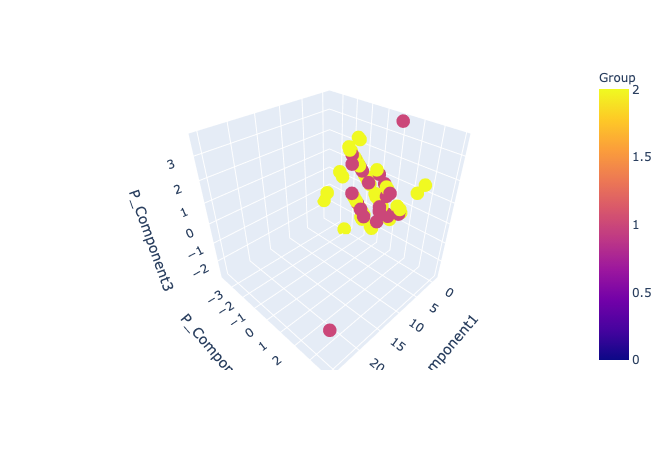

In [70]:
# Visualizing Results
# 3D-Scatter with Clusters

Scatter_Plot = px.scatter_3d(Final_Crypto_df,
                            x="P_Component1",
                            y="P_Component2",
                            z="P_Component3",
                            color="Group",
                            hover_name= "CoinName")

Scatter_Plot.show()

In [71]:
#Table of Tradable Cryptocurrencies
Final_Crypto_df.hvplot.table()

:Table   [Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,P_Component1,P_Component2,P_Component3,CoinName,Group]

In [74]:
# Print the total number of tradable cryptocurrencies 
len(Final_Crypto_df.Algorithm)

533

In [90]:
# Plot the scatter with x="TotalCoinsMined" and y="TotalCoinSupply"
Final_Crypto_df.hvplot.scatter(x="TotalCoinsMined", y="TotalCoinSupply", rot=90, hover_cols=["CoinName"], by="Group", width=500, height=300)


:NdOverlay   [Group]
   :Scatter   [TotalCoinsMined]   (TotalCoinSupply,CoinName)